## Get similar color

Based on a list of colors provided by the user, we can search for the most similar color based on Euclidean distance.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
import re
import plotly.express as px

## Get list of colors

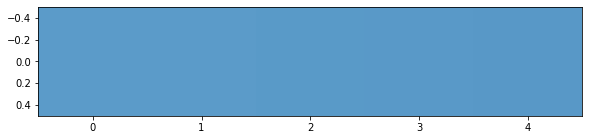

In [2]:
colors = list()
with open('colors.txt', 'r') as f:
    for line in f.readlines():
        colors.append(line.strip())

plt.figure(figsize=(25,2))
plt.imshow( np.array([[int(s) for s in re.findall(r'-?\d+\.?\d*', color)] for color in colors[:5]], dtype = np.uint8).reshape((1, 5, 3)) )
plt.show()

## Get list of colors to get similar

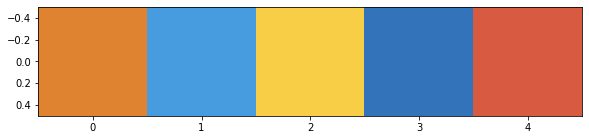

In [3]:
# Get list of colors to get similar
colors_to_get_similar = list()
with open('colors_to_get_similar.txt', 'r') as f:
    for line in f.readlines():
        colors_to_get_similar.append(line.strip())

plt.figure(figsize=(25,2))
plt.imshow( np.array([[int(s) for s in re.findall(r'-?\d+\.?\d*', color)] for color in colors_to_get_similar[:5]], dtype = np.uint8).reshape((1, 5, 3)) )
plt.show()

## Get full spectrum of colors available

In [4]:
len_square = math.ceil(np.sqrt(len(colors)))

rgb_colors = list()
for color in colors + ["rgb(255,255,255)"] * (len_square**2 - len(colors)):
    rgb_colors.append([int(s) for s in re.findall(r'-?\d+\.?\d*', color)])

fig = px.imshow( np.array(rgb_colors, dtype = np.uint8).reshape((len_square, len_square, 3)) )
fig.show()

## Get spectrum of colors to find similar

In [5]:
rgb_colors_to_find_similar = list()
for color in colors_to_get_similar:
    rgb_colors_to_find_similar.append([int(s) for s in re.findall(r'-?\d+\.?\d*', color)])

fig = px.imshow( np.array(rgb_colors_to_find_similar, dtype = np.uint8).reshape((1, len(colors_to_get_similar), 3)) )
fig.show()

# Similar colors found

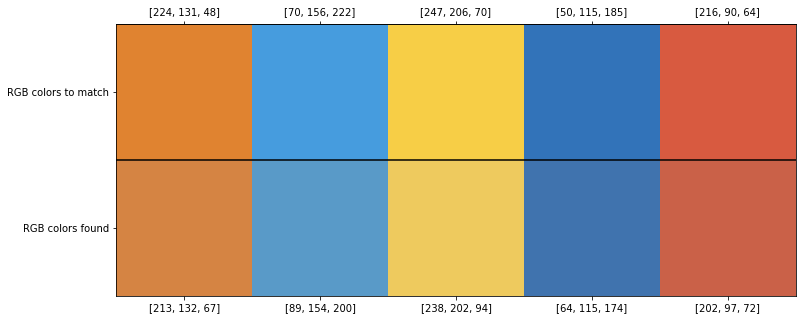

In [6]:
rgbs_to_match = list()
rgbs_found = list()
for rgbstr in colors_to_get_similar:
    rgb_to_match = [int(s) for s in re.findall(r'-?\d+\.?\d*', rgbstr)]
    rgbs_to_match.append([val for val in rgb_to_match])

    matching_distance_colors = 9999999999
    matching_index = -1

    for idx, color in enumerate(colors):
        rgb = [int(s) for s in re.findall(r'-?\d+\.?\d*', color)]
        dist_colors = 0
        for i in range(3):
            dist_colors += (rgb_to_match[i]-rgb[i]) ** 2
        if dist_colors < matching_distance_colors:
            matching_distance_colors = dist_colors
            matching_index = idx

    rgb_found = [int(s) for s in re.findall(r'-?\d+\.?\d*', colors[matching_index])]
    rgbs_found.append([val for val in rgb_found])


fig, ax = plt.subplots(figsize=(25, 5))
ax.imshow( np.array([rgbs_to_match + rgbs_found], dtype = np.uint8).reshape((2, 5, 3)) )
ax.set_xticks(range(5))
ax.set_xticklabels([str(c) for c in rgbs_found])
ax2 = ax.secondary_xaxis('top')
ax2.set_xticks(range(5))
ax2.set_xticklabels([str(c) for c in rgbs_to_match])
ax.set_yticks([0, 1])
ax.set_yticklabels(["RGB colors to match", "RGB colors found"])
ax.axhline(y=0.5, color='k', linestyle='-')
plt.show()

In [7]:
for tomatch, found in zip(rgbs_to_match, rgbs_found):
    print(f"RGB: {tomatch} -> {found}")

RGB: [224, 131, 48] -> [213, 132, 67]
RGB: [70, 156, 222] -> [89, 154, 200]
RGB: [247, 206, 70] -> [238, 202, 94]
RGB: [50, 115, 185] -> [64, 115, 174]
RGB: [216, 90, 64] -> [202, 97, 72]
